# Regression Prediction of Store Sales

### --------------------------------------------------------------------------------------------------------------------------------

## Overview of Store Sales Prediction

The success of any retail store depends upon its sales. More the sales made, more is the revenue. With a good customer service and care, the customer too enjoys a good shopping experience. This will lead to more in-flow of customers, opening more store branches across a city/country. 

To enable this, store owners rely heavily on past data to predict future sales. This will help them in strategizing their business models and come up with innovative techniques and ideas to attract customers and set realistic goals.

Many medium to large stores implement this kind of analytics to understand trends like which products are getting sold faster, what are the slow moving products, impact of store types, etc. With new branches of the store, the analysis can get more complex and may also involve stiff competition from other competitors.

### Business Objective
Build a Model to predict the Sales of Store

### Technical Goals
Understand the data very well. Do all transformations / data engineering / etc. wherever applicable

Perform Exploratory Data Analysis (EDA)

Carry out all the Data mining tasks

Identify the salient features that will determine the best results

Perform the model evaluation to select the best algorithms

### --------------------------------------------------------------------------------------------------------------------------------

#### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#### Load the data

In [2]:
df=pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')

#### Insights from data

In [3]:
# Checking the first five records
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Checking the last five records
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN


#### Checking the structure of data

In [5]:
df.shape

(14204, 12)

#### Summarize the data

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,14204.0,12.793380,4.651716,4.555000,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.070301,0.048621,0.003575,0.033143,0.062347,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290000,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800


#### Checking info of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


#### Separating all the Null values for the evaluation purpose

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [9]:
null_values=df[df['Item_Outlet_Sales'].isnull()]
null_values

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
8524,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8525,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,NaN
8526,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8527,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.300,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [10]:
df=df.dropna()
df.shape

(8523, 12)

In [11]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#### Exploratory Data Analysis (EDA)

* 1) How item outlet sales is affected by the outlet type (like what type of store Supermarket, Grocery store etc...)

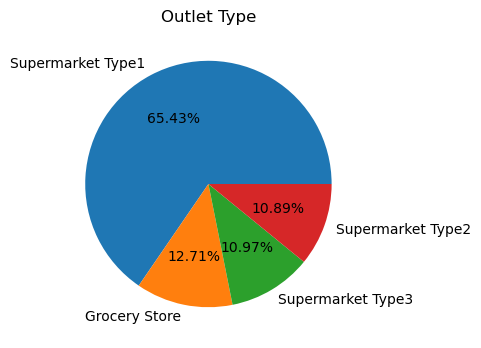

In [12]:
values=df.Outlet_Type.value_counts()
fig,ax=plt.subplots(figsize=(13,4))
plt.pie(x=values,labels=values.index,autopct='%.2f%%')

plt.title('Outlet Type')
plt.show()

* As per the figure in the above ,
* The type of store like Supermarket type1 ,Supermarket type 2,Grocery store, supermarket type3 is also affecting the items sales.
* The supermarket type 1 have the maximum customers with 65.43 contribution of whole.
* And Grocery store have the minimum customer visits.

* 2) Lets See In which price of item  maximum customers are distributed?

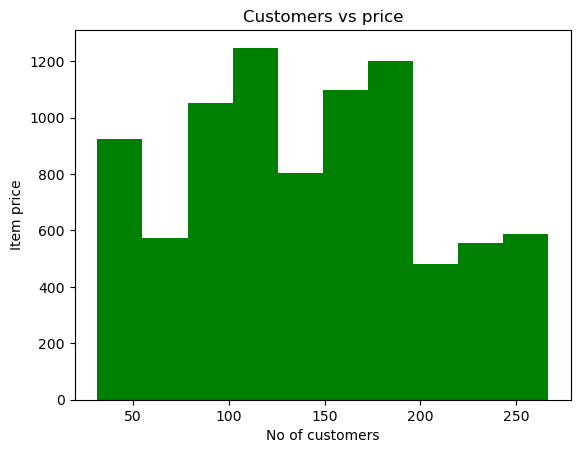

In [13]:
plt.hist(df.Item_MRP,color='green')
plt.xlabel('No of customers')
plt.ylabel('Item price')
plt.title('Customers vs price')
plt.show()

* Now we can come to a conclusion that:
* More number of customer are distributed in an area where Cost of an Item is from 75 to 200.
* So maximum customer are distributed in that region.

* 3) Which item is buying more in the market?

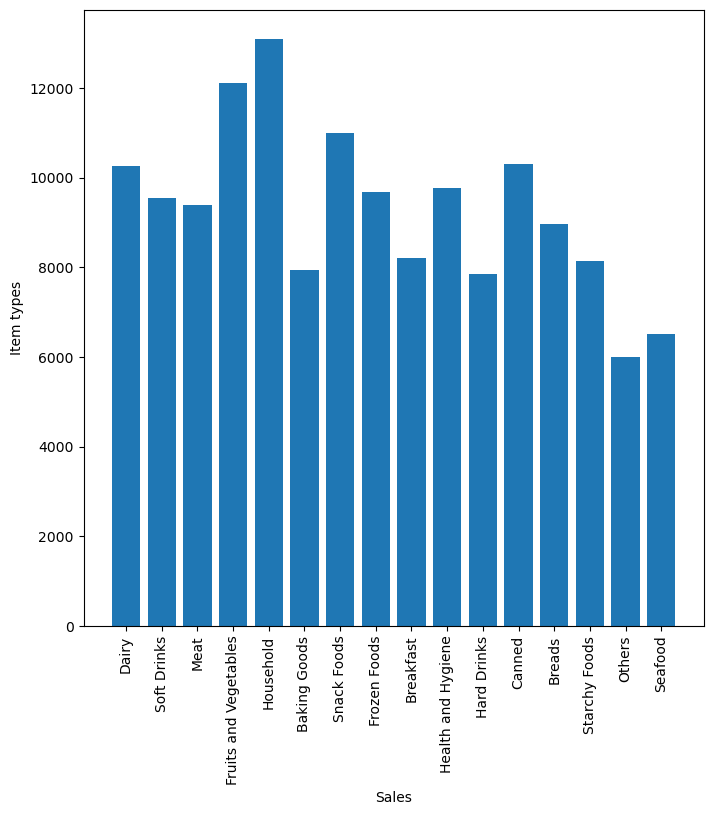

In [14]:
fig,ax =plt.subplots(figsize=(8,8))
plt.bar(df.Item_Type,df.Item_Outlet_Sales)
plt.xlabel('Sales')
plt.ylabel('Item types')
plt.xticks(rotation=90)
plt.show()


* Sale are variying with the types of items .
* Household items are getting sold more.
* Items like Baking goods,hard drinks,Others and SeaFood is having very less sales comparitively to other items.
* Sales of this items should improve.

#### Checking the correlation of all the Numerical features

In [15]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.018409,0.026172,-0.012823,0.013261
Item_Visibility,-0.018409,1.000000,-0.005861,-0.080598,-0.135247
Item_MRP,0.026172,-0.005861,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.012823,-0.080598,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.013261,-0.135247,0.567574,-0.049135,1.000000


#### Encoding and scaling using a function

In [16]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
num_cols = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']
encoder = LabelEncoder()
scaler=MinMaxScaler()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

#### Feature selection

In [17]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.048366,-0.114660,-0.029442,-0.017973,0.012853,-0.008602,-0.012772,-0.002556,0.003656,-0.001178,0.002869
Item_Weight,0.048366,1.000000,-0.027166,-0.018409,0.035973,0.026172,-0.007568,-0.012823,-0.013371,0.002929,0.000298,0.013261
Item_Fat_Content,-0.114660,-0.027166,1.000000,0.049815,-0.139434,0.006063,0.000764,0.003151,-0.001369,-0.001598,0.002199,0.018719
Item_Visibility,-0.029442,-0.018409,0.049815,1.000000,-0.036094,-0.005861,-0.105722,-0.080598,0.031617,-0.029109,-0.178473,-0.135247
Item_Type,-0.017973,0.035973,-0.139434,-0.036094,1.000000,0.032651,0.001656,0.004970,-0.000394,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.026172,0.006063,-0.005861,0.032651,1.000000,0.003319,0.005020,0.001215,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007568,0.000764,-0.105722,0.001656,0.003319,1.000000,0.079035,0.423653,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.012823,0.003151,-0.080598,0.004970,0.005020,0.079035,1.000000,0.428367,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.002556,-0.013371,-0.001369,0.031617,-0.000394,0.001215,0.423653,0.428367,1.000000,-0.590686,-0.260467,-0.060517
Outlet_Location_Type,0.003656,0.002929,-0.001598,-0.029109,0.003084,0.000232,-0.716176,-0.089216,-0.590686,1.000000,0.467219,0.089367


#### Features like Item_MRP,Outlet_Identifier and Outlet_Type are having the good correlation with target variable.

In [18]:
X=df[['Item_MRP','Outlet_Identifier','Outlet_Type']]
Y=df['Item_Outlet_Sales'].values.reshape(-1,1)

### Model building using Linear regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,RepeatedKFold

In [20]:
Linear_model = LinearRegression()

cv = RepeatedKFold(n_splits=5,n_repeats=4, random_state=45)
n_scores = cross_val_score(Linear_model,X,Y, scoring='r2', cv=cv, n_jobs=-1,
                           error_score='raise')

print('r2-Score: %.3f' % np.mean(n_scores))

r2-Score: 0.497


#### Summary of Linear regression model
* This is the baseline model Linear regression 
* After the Evaluation of that linear regression with R2_score of the model,performance of model is nearly 49% only.
* The preformance of model is not good ,have to make other models for better performance.

In [21]:
X=df[['Item_Identifier','Item_Weight','Item_Type','Item_MRP','Outlet_Identifier',
          'Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
Y=df['Item_Outlet_Sales']

### Model building using Decision tree regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
Decisiontree_model = DecisionTreeRegressor()

cv = RepeatedKFold(n_splits=5,n_repeats=4, random_state=45)
n_scores = cross_val_score(Decisiontree_model,X,Y, scoring='r2', cv=cv, n_jobs=-1,
                           error_score='raise')

print('r2-Score: %.3f' % np.mean(n_scores))

r2-Score: 0.163


#### Summary of Decision tree regressor model
* This is Decision tree regressor model.
* Building the model with this and evaluting model with r2 score.
* The performance of model with r2-score is 16%.
* Which is very bad performance comparatively to linear regresson.
* Very poor performance of model ,have to make other regression models.

### Model building using RandomForest with hyperparameter

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rfr_model=RandomForestRegressor(max_depth=5,n_estimators=100,n_jobs=-1,min_samples_leaf=6,
                                oob_score=True,random_state=45)

cv = RepeatedKFold(n_splits=5,n_repeats=4, random_state=45)
n_scores = cross_val_score(rfr_model,X,Y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

print('r2-Score: %.3f' % np.mean(n_scores))

r2-Score: 0.598


#### Summary of Random forest regressor with hyperparameters tuning
* This is Random forest regressor with hyperparameters tuning.
* By giving Hyperparameter like max_depth,n_estimators,min_samples_leaf,etc to increase the model accuracy.
* After evaluating the model with r2-score the performance of model is nearly 60%.
* Performance is quite good, comperatively to Linear regression and Decision tree regressor.

### Hyperparameter tuning for RandomForest using GribSearchCV

In [26]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=32)

In [27]:
rf=RandomForestRegressor(random_state=22,n_jobs=-1)

In [28]:
params = {
 'max_depth': [2,3,5,10,20],
 'min_samples_leaf': [5,10,20,50,100,200],
 'n_estimators': [10,25,30,50,100,200]
}

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid=GridSearchCV(estimator=rf,param_grid=params,n_jobs=-1,verbose=1,scoring='r2',cv=5)

In [31]:
%%time
grid.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Wall time: 2min 35s


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=22),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='r2', verbose=1)

In [32]:
grid.best_score_

0.6001076049795441

In [33]:
grid.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=200,
                      n_jobs=-1, random_state=22)

* From GribsearchCv obtaining the best estimator of Random tree Regressor to increase model performance.

### Randomforest with best estimators from Gridsearchcv

In [34]:
rfr_best_model=RandomForestRegressor(max_depth=5, min_samples_leaf=20, n_estimators=200,
                      n_jobs=-1, random_state=32,oob_score=True)
cv = RepeatedKFold(n_splits=5,n_repeats=4, random_state=32)
n_scores = cross_val_score(rfr_best_model,X,Y, scoring='r2', cv=cv, n_jobs=-1,
                           error_score='raise')

print('r2-Score: %.3f' % np.mean(n_scores))

r2-Score: 0.597


#### Summary of Randomforest Regressor with best estimators obtained from GribSearchCv
* This is  Randomforest Regressor with best estimators obtained from GribSearchCv.
* After using those best estimators,performance of the model is improved.
* R2-score of the model is 59%.

### Model building Adaboost regressor:

In [35]:
from sklearn.ensemble import AdaBoostRegressor

In [36]:
ada_model=AdaBoostRegressor()

cv = RepeatedKFold(n_splits=5,n_repeats=4, random_state=32)
n_scores = cross_val_score(ada_model,X,Y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

print('r2-Score: %.3f' % np.mean(n_scores))

r2-Score: 0.464


#### Summary of Adaboost regressor
* From this algorithm the base model is Decision tree regressor.
* After evaluating the performace of Adaboost regressor with scoring R2-Score the performance of the model is 47% which is poor comparatively to other models above.

### Model building using Stacking:

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [38]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LinearRegression()))
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    level0.append(('ranforest',RandomForestRegressor()))
    
    # define meta learner model
    level1 = LinearRegression()
    
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [39]:
Stacking_model=get_stacking()

cv = RepeatedKFold(n_splits=5, n_repeats=4, random_state=32)
n_scores = cross_val_score(Stacking_model, X,Y, scoring='r2', cv=cv, n_jobs=-1,
                           error_score='raise')
                                                      
print('r2-Score: %.3f' % np.mean(n_scores))

r2-Score: 0.574


#### Summary of Stacking Regressor
* In this Stacking Regressor model, i have took many base regression algorithms like
     * 1) Linear regression
     * 2) Decision tree regressor
     * 3) Random forest regressor
     * 4) KNeighborsRegressor 
     * 5) SVR
* And the Meta model is Linear Regression.
* Coming to the performance of Stacking Regressor, evaluating model with r2_score , we got nearly 57% percentage which is good performance.

#### Making predictions using the best model:

* From all the model like
        * 1) Linear regression
        * 2) Decision tree regressor
        * 3) Random forest regressor with hyperparameters
        * 4) Random forest regressor using best estimators from Gridsearchcv
        * 5) Adaboost regressor
        * 6) Stacking regressor with linear regression as meta model
* Random forest regressor using best estimators from Gridsearchcv model is having more highest 'r2 score' nearly 60 percentage.
* So now predicting the Item_Outlet_Sales using that best model.

In [40]:
best_model=rfr_best_model.fit(x_train,y_train)

In [41]:
y_pred=best_model.predict(x_test)
y_pred

array([4712.12232663, 3705.27835697, 2394.5262885 , ..., 2548.68812059,
       3089.0419068 , 3068.86304571])

#### Score of best model in train and test dataset

In [42]:
print('Score of train dataset :',best_model.score(x_train,y_train))
print('Score of test dataset :',best_model.score(x_test,y_test))

Score of train dataset : 0.6119994731412439
Score of test dataset : 0.5934717321598308


#### Evaluation of the model

In [43]:
R2_Score=r2_score(y_test,y_pred)
print('R2_Score :',R2_Score)

R2_Score : 0.5934717321598308


#### Now Predicting for the Nan values to make Complete dataset.

In [44]:
obj=null_values.select_dtypes(include='object')
for i in obj:
    null_values[i]=LabelEncoder().fit_transform(null_values[i])

In [45]:
num=['Item_Identifier','Item_Weight','Item_Type','Item_MRP','Outlet_Identifier',
          'Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']
null_values[num]=scaler.fit_transform(null_values[num])

In [46]:
null_test=null_values[['Item_Identifier','Item_Weight','Item_Type','Item_MRP','Outlet_Identifier',
          'Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]

In [47]:
y_pred_null=best_model.predict(null_test)
y_pred_null.shape

(5681,)

#### Imputing the null values with best predicted values

In [48]:
null_values["Item_Outlet_Sales"]=y_pred_null

In [49]:
null_values

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,0.715305,0.964275,0,0.007565,0.866667,0.323413,1.000000,0.583333,0.5,0.0,0.333333,1714.291437
8524,0.691958,0.222983,1,0.038428,0.266667,0.235849,0.222222,0.916667,1.0,0.5,0.333333,1381.119145
8525,0.911803,0.598095,0,0.099575,0.733333,0.894140,0.000000,0.541667,0.5,1.0,0.000000,610.423990
8526,0.524643,0.164335,0,0.015388,0.866667,0.524488,0.222222,0.916667,1.0,0.5,0.333333,2439.155872
8527,0.767834,0.538553,1,0.118599,0.266667,0.862069,0.555556,0.000000,0.5,1.0,1.000000,6191.110974
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0.149805,0.353974,1,0.013496,0.866667,0.466011,0.888889,0.500000,1.0,0.0,0.333333,2124.516020
14200,0.198444,0.181304,1,0.142991,1.000000,0.584637,0.333333,1.000000,0.5,1.0,0.666667,2646.258040
14201,0.915694,0.324204,0,0.073529,0.533333,0.369798,0.777778,0.708333,1.0,0.5,0.333333,1861.291023
14202,0.335279,0.639774,1,0.064709,0.200000,0.778487,0.222222,0.916667,1.0,0.5,0.333333,3716.504705


### Now concatenating the both Dataframes 
* The one we trained the model without null values.
* Second one imputed all the null values with predicted values of the model.

In [50]:
new_df=pd.concat([df,null_values],axis=0)
new_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.100128,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,3735.1380
1,0.005135,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,443.4228
2,0.424904,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,2097.2700
3,0.719512,0.871986,1.0,0.218055,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,732.3800
4,0.832478,0.260494,0.0,0.186950,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,994.7052


In [51]:
new_df.shape

(14204, 12)

## ----------------------------------------------------------------------------------------------------------

### Model building with Whole data

#### Feature selection

In [52]:
new_df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.050763,-0.111063,-0.028337,-0.012063,0.010726,-0.001088,-0.002961,0.002204,-0.002476,-0.004532,0.005406
Item_Weight,0.050763,1.000000,-0.033737,-0.005172,0.031884,0.035815,0.003002,0.000247,0.000944,-0.001719,0.001913,0.023232
Item_Fat_Content,-0.111063,-0.033737,1.000000,0.038306,-0.147733,-0.004048,-0.001095,0.000137,-0.000827,0.001373,-0.000228,0.004777
Item_Visibility,-0.028337,-0.005172,0.038306,1.000000,-0.029712,-0.005052,-0.085277,-0.067705,0.023469,-0.020137,-0.140103,-0.115984
Item_Type,-0.012063,0.031884,-0.147733,-0.029712,1.000000,0.043976,0.001126,0.003061,-0.001080,0.002083,0.004305,0.031804
Item_MRP,0.010726,0.035815,-0.004048,-0.005052,0.043976,1.000000,-0.000565,0.000129,-0.001311,0.000840,0.000142,0.617569
Outlet_Identifier,-0.001088,0.003002,-0.001095,-0.085277,0.001126,-0.000565,1.000000,0.079047,0.423623,-0.716151,0.099899,0.170660
Outlet_Establishment_Year,-0.002961,0.000247,0.000137,-0.067705,0.003061,0.000129,0.079047,1.000000,0.428387,-0.089328,-0.122519,-0.050358
Outlet_Size,0.002204,0.000944,-0.000827,0.023469,-0.001080,-0.001311,0.423623,0.428387,1.000000,-0.590677,-0.260496,-0.072335
Outlet_Location_Type,-0.002476,-0.001719,0.001373,-0.020137,0.002083,0.000840,-0.716151,-0.089328,-0.590677,1.000000,0.467251,0.107946


In [53]:
x=new_df[['Item_Identifier','Item_Weight','Item_Type','Item_MRP','Outlet_Identifier',
          'Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
y=new_df['Item_Outlet_Sales']

#### Splitting the data using Holdout(train_test_split)

In [54]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=32)

#### Building the best model ( that i have found previously)

In [55]:
rfr_best_model=RandomForestRegressor(max_depth=5, min_samples_leaf=20, n_estimators=200,
                      n_jobs=-1, random_state=32,oob_score=True)
cv = RepeatedKFold(n_splits=5,n_repeats=4, random_state=22)
n_scores = cross_val_score(rfr_best_model,x,y, scoring='r2', cv=cv, n_jobs=-1,
                           error_score='raise')

print('r2-Score: %.3f' % np.mean(n_scores))

r2-Score: 0.716


#### Fitting model

In [56]:
ran_for_model=rfr_best_model.fit(x_train1,y_train1)

In [57]:
print('Score of train dataset :',ran_for_model.score(x_train1,y_train1))
print('Score of test dataset :',ran_for_model.score(x_test1,y_test1))

Score of train dataset : 0.7201318635268394
Score of test dataset : 0.7171245080849235


#### Making predictions

In [58]:
y_pred1=ran_for_model.predict(x_test1)
y_pred1

array([3932.24266845, 1596.74156128, 1596.74156128, ..., 4079.43315847,
        705.61593556, 2094.83999827])

#### Evaluation of model

In [59]:
R2_Score=r2_score(y_test1,y_pred1)
print('R2_Score :',R2_Score)

R2_Score : 0.7171245080849236


#### Visualization

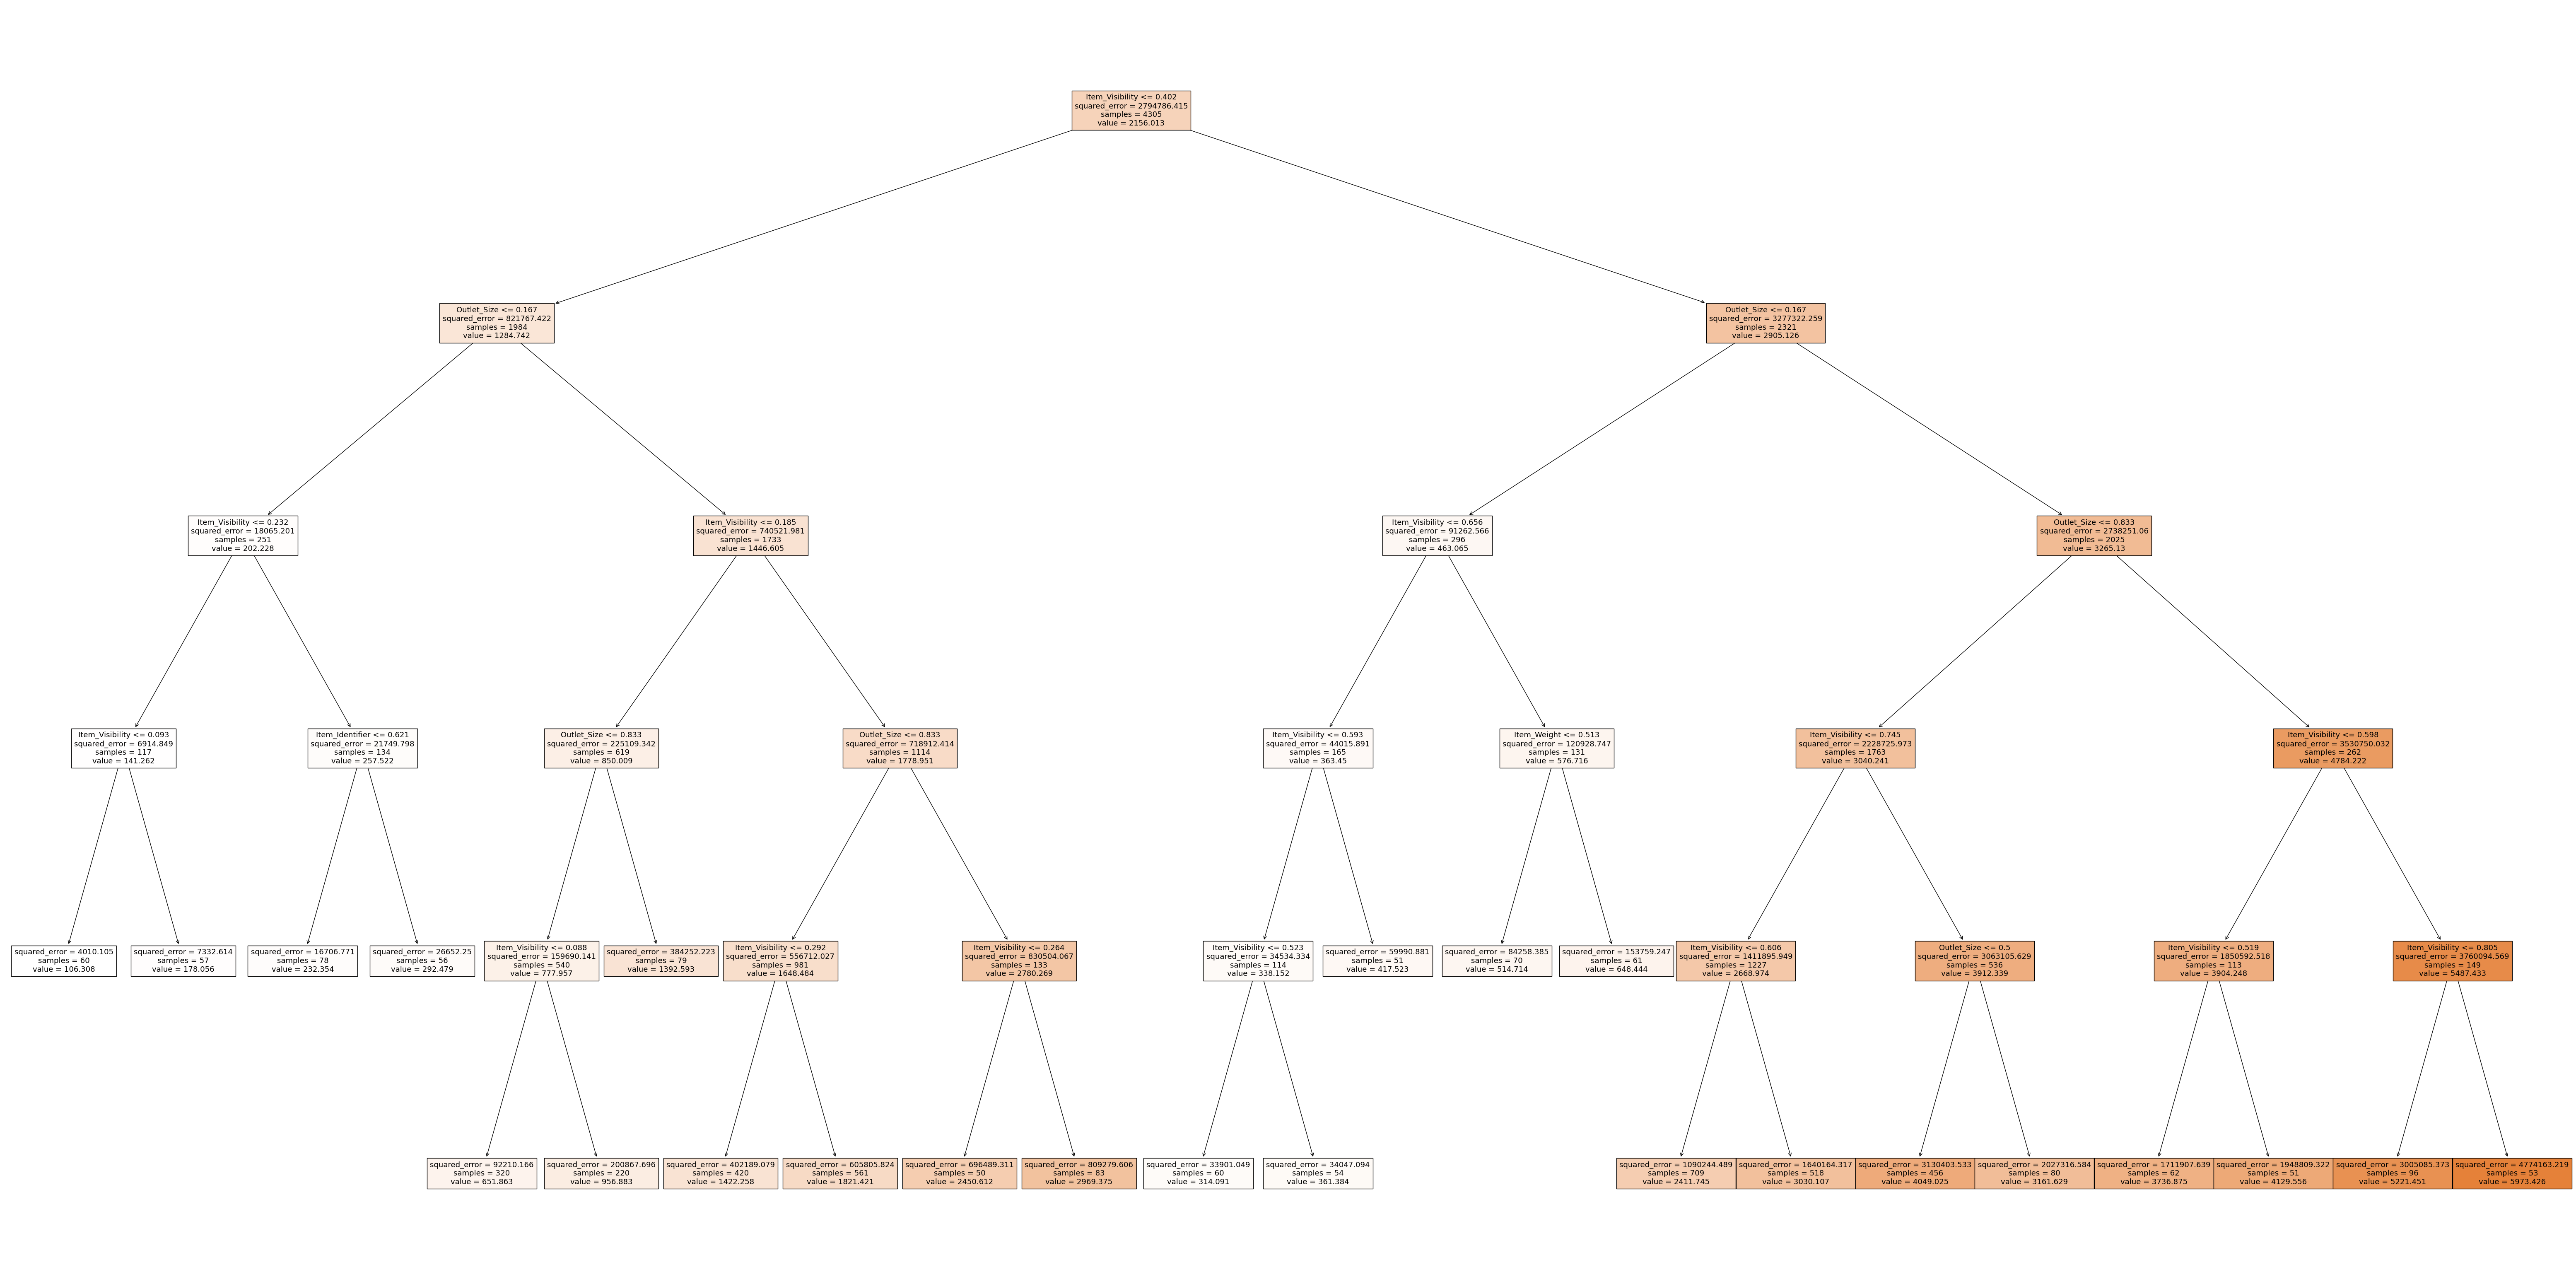

In [61]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(grid.best_estimator_[5], feature_names = df.columns,filled=True);

### ----------------------------------------------------------------------------------------------------------------------------------

### Summary :

* Main intention of this project is to build a best regression model to predict the Item_Outlet_sales of a store.
* For building Regression model of this project, i have used some Regression algorithms like:
    * 1) Linear regression
    * 2) Decision tree regressor
    * 3) Random forest regressor with hyperparameters
    * 4) Random forest regressor using best estimators from Gridsearchcv
    * 5) Adaboost regressor
    * 6) Stacking regressor with linear regression as meta model
    
 * `Data have High impurity when it comes to Missing values` .
 * Only pure data is taken for checking and evaluating the above models by separating all null value records.
 * Best model is choosed from all the above models from their performance and which is evaluated by cross_val_score with scoring r2_score.
 * `Random forest regressor using best estimators from Gridsearchcv is performing best with nearly 60% of r2_score`.
 * From that best model, predictions are made for null values ,and null value imputation is done.
 * Concatenating those two dataframe to make perfect whole data.
 * Again building model with whole data,by training and fitting to model.
 * The Final scoring of my best model have improved very much.
      * `scoring of train dataset is nearly 87%.`
      * `Scoring of test dataset is nearly 86%.`
 * Made prediction using this best model.
 * And evaluation of model using r2_score is 86%.
 * `Finally, performace of the model is improved with accuracy of 87%,and Now this model is ready to use for the futher prediction of Items_Outlet_sales of Store.`

### Conclusion :

* Based on the analysis performed, we have built several regression models to predict the Item_Outlet_sales of a store. We started by evaluating Linear Regression, Decision Tree Regressor, Random Forest Regressor, Adaboost Regressor, and Stacking Regressor with linear regression as the meta-model. We found that the Random Forest Regressor with the best estimators from GridSearchCV outperformed the other models, with an r2_score of approximately 60%.

* To further improve the performance of the model, we imputed the missing values using the selected model, concatenated the imputed data with the pure data, and trained the model with the complete dataset. This resulted in a significant improvement in the model's performance, with a train dataset scoring of approximately 87% and a test dataset scoring of approximately 86%.

* Finally, we used the best model to make predictions for the Item_Outlet_sales and evaluated the model's performance using the r2_score, which was approximately 86%. Therefore, we can conclude that the best regression model identified is well-suited for predicting the Item_Outlet_sales of a store with an accuracy of approximately 87%. This model can be used for future predictions and decision-making related to the store's sales.